In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
import pynance as pn


Historical Data of Apple:

In [8]:
# Load CSV file
df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (10998, 8)

First 5 rows:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0


In [4]:
# --- TA-Lib Indicators ---
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
df['MACD'], df['MACD_Signal'], _ = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

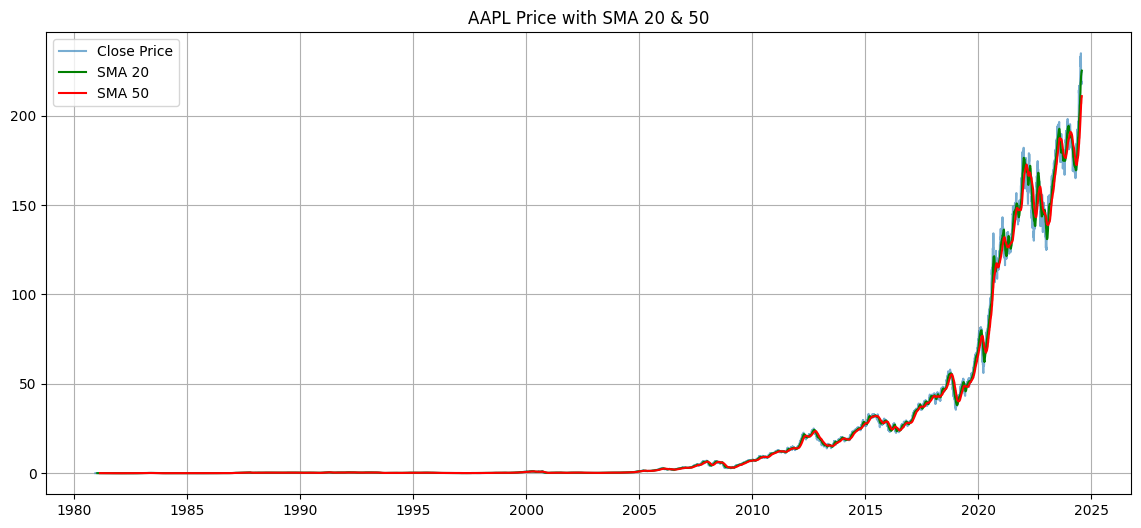

In [5]:
# --- Plot: Price with SMA ---
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', alpha=0.6)
plt.plot(df['SMA_20'], label='SMA 20', color='green')
plt.plot(df['SMA_50'], label='SMA 50', color='red')
plt.title('AAPL Price with SMA 20 & 50')
plt.legend()
plt.grid(True)
plt.show()

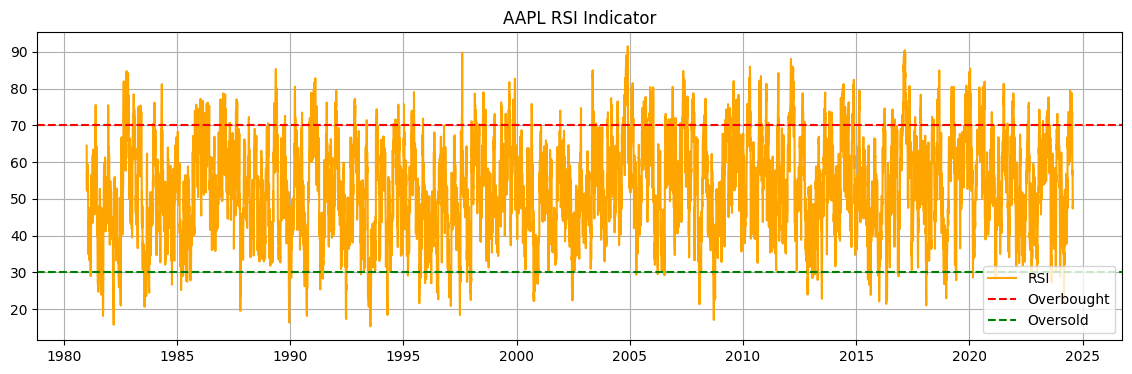

In [6]:
# --- Plot: RSI ---
plt.figure(figsize=(14, 4))
plt.plot(df['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('AAPL RSI Indicator')
plt.legend()
plt.grid(True)
plt.show()

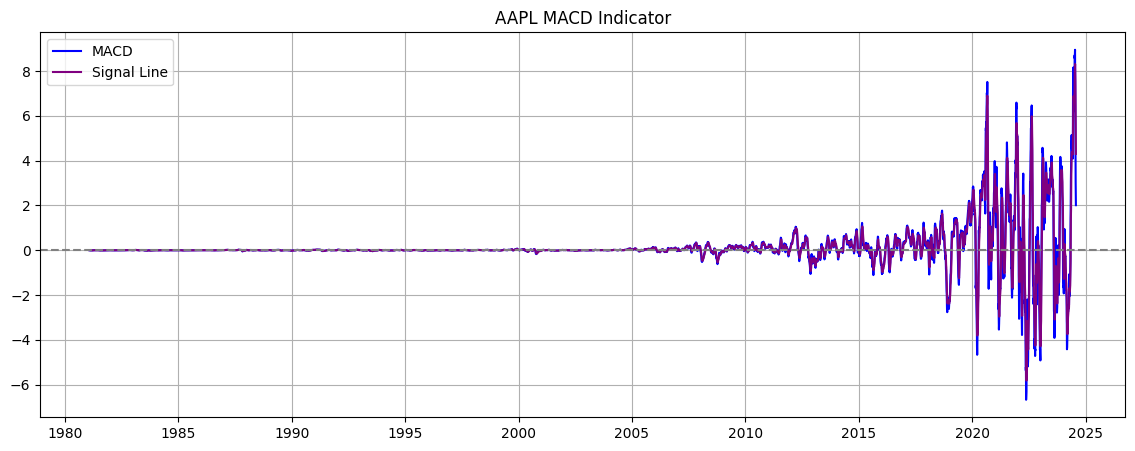

In [7]:
# --- Plot: MACD ---
plt.figure(figsize=(14, 5))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal Line', color='purple')
plt.axhline(0, color='gray', linestyle='--')
plt.title('AAPL MACD Indicator')
plt.legend()
plt.grid(True)
plt.show()

Observations
1. SMA (Simple Moving Averages)
Golden Cross: When SMA 20 crosses above SMA 50 — suggests potential upward momentum.

Death Cross: When SMA 20 falls below SMA 50 — suggests bearish sentiment.

These crossovers are effective entry/exit signals for trend-following strategies.

2. RSI (Relative Strength Index)
Above 70: AAPL stock often entered overbought zones during rallies — often followed by corrections.

Below 30: RSI dipped into oversold territory during dips — providing potential buy opportunities.

RSI is ideal for momentum-based strategies.

3. MACD (Moving Average Convergence Divergence)
MACD > Signal Line: Bullish condition — buyers are in control.

MACD < Signal Line: Bearish signal — sellers are gaining strength.

MACD crossovers preceded significant price movements in several periods.

In [27]:
# Load the data
df = pd.read_csv('../data/yfinance_data/AAPL_historical_data.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)


